<a href="https://colab.research.google.com/github/javajerry/Algorithm-Trading/blob/main/OBV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Description: This program uses On-Balance Volume to determine when to buy and sell stock

In [30]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [43]:
#Load the stock data
from google.colab import files
uploaded = files.upload()

Saving GOOG (1).csv to GOOG (1).csv


In [44]:
#Store the data into a data frame
df = pd.read_csv('GOOG (1).csv')
# Set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-06-25,2020-06-25,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500
2020-06-26,2020-06-26,1431.390015,1433.449951,1351.989990,1359.900024,1359.900024,4265200
2020-06-29,2020-06-29,1358.180054,1395.599976,1347.010010,1394.969971,1394.969971,1810200
2020-06-30,2020-06-30,1390.439941,1418.650024,1383.959961,1413.609985,1413.609985,2042400
2020-07-01,2020-07-01,1411.099976,1443.000000,1409.819946,1438.040039,1438.040039,1775200
...,...,...,...,...,...,...,...
2020-12-18,2020-12-18,1754.180054,1755.109985,1720.219971,1731.010010,1731.010010,4016400
2020-12-21,2020-12-21,1713.510010,1740.849976,1699.000000,1739.369995,1739.369995,1828400
2020-12-22,2020-12-22,1734.430054,1737.405029,1712.574951,1723.500000,1723.500000,936700
2020-12-23,2020-12-23,1728.109985,1747.989990,1725.040039,1732.380005,1732.380005,1033800


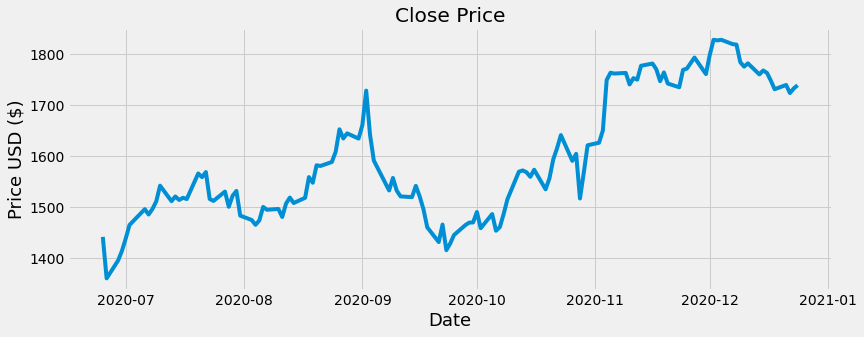

In [45]:
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close')
plt.title('Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.show()

In [46]:
#Calculate the On Balance Volume
OBV = []
OBV.append(0)

# through the data set (close price) from the second row (index 1) to the end of the data set
for i in range (1, len(df.Close)):
  if df.Close[i] > df.Close[i-1]:
    OBV.append(OBV[-1] + df.Volume[i])
  elif df.Close[i] < df.Close[i-1]:
    OBV.append(OBV[-1] - df.Volume[i])
  else:
    OBV.append(OBV[-1])

In [47]:
#Store the OBV and OBV EMA (Exponential Moving Average) into new Colums
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
#show the data
df


,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
2020-06-25,2020-06-25,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500,0,0.000000e+00
2020-06-26,2020-06-26,1431.390015,1433.449951,1351.989990,1359.900024,1359.900024,4265200,-4265200,-2.239230e+06
2020-06-29,2020-06-29,1358.180054,1395.599976,1347.010010,1394.969971,1394.969971,1810200,-2455000,-2.318459e+06
2020-06-30,2020-06-30,1390.439941,1418.650024,1383.959961,1413.609985,1413.609985,2042400,-412600,-1.768267e+06
2020-07-01,2020-07-01,1411.099976,1443.000000,1409.819946,1438.040039,1438.040039,1775200,1362600,-1.010937e+06
...,...,...,...,...,...,...,...,...,...
2020-12-18,2020-12-18,1754.180054,1755.109985,1720.219971,1731.010010,1731.010010,4016400,17587800,2.415238e+07
2020-12-21,2020-12-21,1713.510010,1740.849976,1699.000000,1739.369995,1739.369995,1828400,19416200,2.370132e+07
2020-12-22,2020-12-22,1734.430054,1737.405029,1712.574951,1723.500000,1723.500000,936700,18479500,2.320400e+07
2020-12-23,2020-12-23,1728.109985,1747.989990,1725.040039,1732.380005,1732.380005,1033800,19513300,2.285250e+07


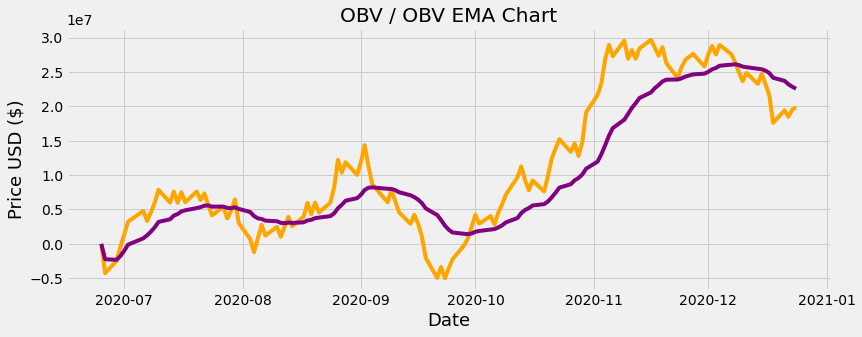

In [48]:
#Create and plot the graph OBV and OBV_EMA
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['OBV'], label = 'OBV', color='orange')
plt.plot(df['OBV_EMA'], label = 'OBV EMA', color='purple')
plt.title('OBV / OBV EMA Chart')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.show()

In [58]:
#Create a function to signal when to buy and sell the stock
# If OBV > OBV_EMA then Buy 
# IF OBV < OBV_EMA Then Sell
# Else do nothing
# Col1 --> OBV & Col2 --> OBV_EMA

def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  #Loop thriugh the length of the data set
  for i in range(0, len(signal)):
    if signal[col1][i] > signal[col2][i] and flag != 1:
      sigPriceBuy.append(signal['Close'][i])
      sigPriceSell.append(np.nan)
      flag = 1
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      sigPriceSell.append(signal['Close'][i])
      sigPriceBuy.append(np.nan)
      flag = 0
    else:
      sigPriceSell.append(np.nan)
      sigPriceBuy.append(np.nan)
  return (sigPriceBuy, sigPriceSell)      



In [59]:
#Create buy an Sell columns
x = buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
df

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
2020-06-25,2020-06-25,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500,0,0.000000e+00,NaN,NaN
2020-06-26,2020-06-26,1431.390015,1433.449951,1351.989990,1359.900024,1359.900024,4265200,-4265200,-2.239230e+06,NaN,1359.900024
2020-06-29,2020-06-29,1358.180054,1395.599976,1347.010010,1394.969971,1394.969971,1810200,-2455000,-2.318459e+06,NaN,NaN
2020-06-30,2020-06-30,1390.439941,1418.650024,1383.959961,1413.609985,1413.609985,2042400,-412600,-1.768267e+06,1413.609985,NaN
2020-07-01,2020-07-01,1411.099976,1443.000000,1409.819946,1438.040039,1438.040039,1775200,1362600,-1.010937e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,2020-12-18,1754.180054,1755.109985,1720.219971,1731.010010,1731.010010,4016400,17587800,2.415238e+07,NaN,NaN
2020-12-21,2020-12-21,1713.510010,1740.849976,1699.000000,1739.369995,1739.369995,1828400,19416200,2.370132e+07,NaN,NaN
2020-12-22,2020-12-22,1734.430054,1737.405029,1712.574951,1723.500000,1723.500000,936700,18479500,2.320400e+07,NaN,NaN
2020-12-23,2020-12-23,1728.109985,1747.989990,1725.040039,1732.380005,1732.380005,1033800,19513300,2.285250e+07,NaN,NaN


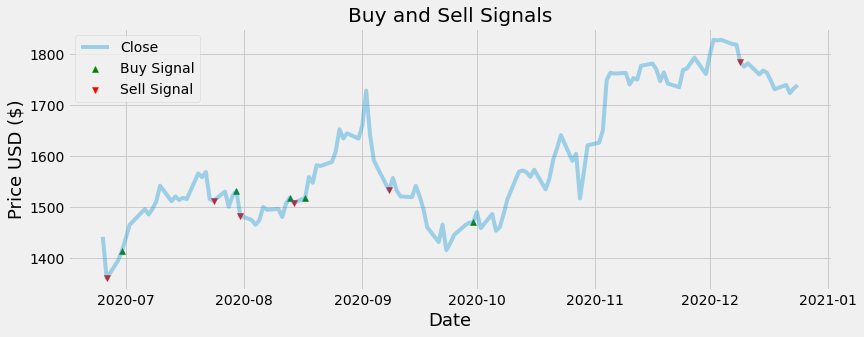

In [60]:
#Plot the buy and sell prices
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close', alpha = 0.35)
plt.scatter(df.index, df['Buy_Signal_Price'], label = 'Buy Signal', marker = '^', alpha=1, color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell Signal', marker = 'v', alpha = 1, color='red')
plt.title('Buy and Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()